# Проект SQL

**Цель:**

- проанализировать базу данных для крупного сервиса чтения книг по подписке.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Задачи:**

- посчитать сколько книг вышло после 1 января 2000 года;
- для каждой книги посчитать количество обзоров и среднюю оценку;
- определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
- определить автора с самой высокой средней оценкой книг — учитывая только книги с 50 и более оценками;
- посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

**Описание данных**

*Таблица books*
содержит данные о книгах:

- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

*Таблица authors*
содержит данные об авторах:

- author_id — идентификатор автора;
- author — имя автора.

*Таблица publishers*
содержит данные об издательствах:

- publisher_id — идентификатор издательства;
- publisher — название издательства.

*Таблица ratings*
содержит данные о пользовательских оценках книг:

- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

*Таблица reviews*
содержит данные о пользовательских обзорах:

- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя автора обзора;
- text — текст обзора.

**Схема данных**
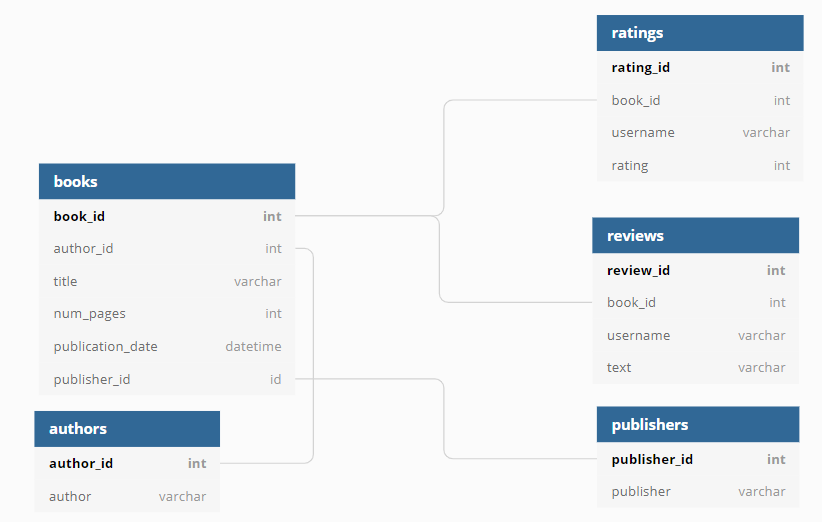

In [1]:
#импортируем библиотеки

import pandas as pd
from sqlalchemy import text, create_engine

#устанавливаем параметры

db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

#сохраняем коннектор

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

#чтобы выполнить SQL-запрос, используем Pandas

query = '''
SELECT * 
FROM books 
LIMIT 5
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Выведем первые 5 строк всех исследуемых таблиц.

In [2]:
query = '''
SELECT * 
FROM authors 
LIMIT 5
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [3]:
query = '''
SELECT * 
FROM ratings 
LIMIT 5
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [4]:
query = '''
SELECT * 
FROM reviews 
LIMIT 5
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [5]:
query = '''
SELECT * 
FROM publishers
LIMIT 5
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
#посчитаем, сколько книг вышло после 1 января 2000 года

query = '''
SELECT COUNT(*) 
FROM books
WHERE publication_date > '2000-01-01'
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,count
0,819


После 1 января 2000 года вышло 819 книг.

In [7]:
#для каждой книги посчитаем количество обзоров и среднюю оценку

query = '''
SELECT b.book_id,
       b.title,
       review_count,
       avg_rating
FROM books as b
LEFT JOIN 
  (SELECT book_id,
          COUNT(review_id) as review_count
   FROM reviews 
   GROUP BY book_id) AS rev ON b.book_id = rev.book_id
LEFT JOIN 
   (SELECT book_id,
           ROUND(AVG(rating),2) as avg_rating
    FROM ratings 
    GROUP BY book_id) AS rat ON b.book_id = rat.book_id 
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,title,review_count,avg_rating
0,652,The Body in the Library (Miss Marple #3),2.0,4.50
1,273,Galápagos,2.0,4.50
2,51,A Tree Grows in Brooklyn,5.0,4.25
3,951,Undaunted Courage: The Pioneering First Missio...,2.0,4.00
4,839,The Prophet,4.0,4.29
...,...,...,...,...
995,64,Alice in Wonderland,4.0,4.23
996,55,A Woman of Substance (Emma Harte Saga #1),2.0,5.00
997,148,Christine,3.0,3.43
998,790,The Magicians' Guild (Black Magician Trilogy #1),2.0,3.50


Всего в базе данных 1000 книг, для каждой из них мы посчитали количество обзоров и средний рейтинг. Максимальное количество ревью 7 и есть книги вообще без обзоров. Средняя оценка варьируется от 5 до 1.5. 

Для предложений по новому продукту следует обращать внимание не только на книги с высоким средним рейтингом, но и на книги с большим количеством отзывов, которые привлекли внимание читателей.

In [8]:
#определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры

query = '''
SELECT publisher
FROM publishers AS p
JOIN 
  (SELECT COUNT(book_id),
          publisher_id
   FROM books 
   WHERE num_pages > 50
   GROUP BY publisher_id
   ORDER BY COUNT(book_id) DESC
   LIMIT 1) AS i ON p.publisher_id= i.publisher_id
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher
0,Penguin Books


Таким образом, исключив из анализа книги менее 50 страниц, мы избавились от брошюр и определили, что издательство, выпустившее наибольшее число книг - это Penguin Books.

In [9]:
#определим автора с самой высокой средней оценкой книг — учтем только книги с 50 и более оценками

query = '''
WITH 
top_rat AS (SELECT book_id,
                   AVG(rating),
                   COUNT(rating)
            FROM ratings
            GROUP BY book_id
            HAVING COUNT(rating) > 50
            ORDER BY AVG(rating) DESC),
            
top_auth AS (SELECT book_id,
                    author
             FROM books AS b
             LEFT JOIN authors AS a ON b.author_id = a.author_id)
             
SELECT top_auth.author,
       AVG(top_rat.avg)
FROM top_rat LEFT JOIN top_auth ON top_rat.book_id = top_auth.book_id
GROUP BY top_auth.author
ORDER BY AVG(top_rat.avg) DESC
LIMIT 1
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.283844


Джоан Роулинг с серией книг о Гарри Поттере оказалась автором с самым высокий средним рейтингом по своим кинигам, причем мы учитывали только книги с 50 и более оценками.

In [10]:
#посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок

query = '''
WITH
u AS (SELECT username,
             COUNT(rating)     
      FROM ratings
      GROUP BY username
      HAVING COUNT(rating) > 48),

r AS (SELECT username,
             COUNT(text) as review_count    
      FROM reviews
      GROUP BY username)
      
SELECT AVG(review_count)
FROM r JOIN u ON r.username = u.username
'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,avg
0,24.0


Активные пользователи - те которые поставили более 48 оценок, также активно пишут обзоры, в среднем по 24 ревью.

**Вывод**

Ознакомившись с базой данных, содержащей информацию о книгах, издательствах, авторах, а также пользовательских обзорах книг и их оценках, мы пришли к следующим выводам:

- всего в базе данных 1000 книг, для каждой из них мы посчитали количество обзоров и средний рейтинг. Максимальное количество ревью 7 и есть книги вообще без обзоров. Средняя оценка варьируется от 5 до 1.5. Таким образом, для предложений по новому продукту следует обращать внимание не только на книги с высоким средним рейтингом, но и на книги с большим количеством отзывов, которые привлекли внимание читателей;

- исключив из анализа книги менее 50 страниц, мы избавились от брошюр и определили, что издательство, выпустившее наибольшее число книг - это Penguin Books;

- автор с самым высокий средним рейтингом по своим книгам это Джоан Роулинг, среди книг с количеством оценок 50 и более;

- наиболее активные пользователи - те которые поставили более 48 оценок, также активно пишут обзоры, в среднем по 24 ревью. В новом продукте можно реализовать бонусную систему и начислять бонусы таким пользователям за написание отзывов, которые в дальнейшем можно будет использовать в приложении.